 
---
# Abstract
---

In this document I present a formal framework for the Reinforcement Learning(RL) problem and present simple toy example 
of how RL can be utilized to solve agricultural problems. The problem is characterized as a Markov Decision Process(MDP) in 
a grid world. The example simulates a field of plants that require watering and the algorithms goal is to keep the soil
 moisture in an ideal range. I present both Policy iteration and Value iteration solutions to the MDP. 
 

# 1.0 Formalism of the Reinforcement Learning Framework
---

Our initial discussion of agriculture in RL must start with a formal definition of the RL framework that is utilized. Lets 
start with a few important definitions. 

## 1.1 If life's a game, who's playing? 
The two main components in our "game" are the Agent and the Environment. The Agent is the component that we are writing the algorithm for. 
The Environment is everthing in the system that is not the Agent. The two components interact via actions $ a_t \in \mathcal {A}$, 
observation $o_t \in \mathcal O$, and rewards $r_t \in \mathcal R$. 

At each time step $t$ the agent:
- Executes and action $\mathcal {a_t}$
- Receives an observation $\mathcal {o_t}$
- Receives a scalar reward $\mathcal {r_t}$
  
At each time step $t$ the environment:
- Receives and action $\mathcal {a_t}$
- Emits observation $\mathcal {o_t}$
- Emits scalar reward $\mathcal {r_t}$ 

## 1.2 How do we summarize this information in a useful way?
The history is the sequence of observations actions and rewards observed up to time $t$.  
$$H_t = \mathcal {a_1,o_1,r_1,\ldots,a_t, o_t, r_t}$$

The history is not practical for a numner of reasons. For example, if we have long time series then storage would become onerous. 
Therefore, it is useful to define concept called state $\mathcal S_t$ that summarizes the the history up to the current 
time step $t$.  
$$S_t := f(H_t)$$

There are a couple definitions of state that can be conceptually useful. The **environment state** $S^e_t$ is the 
environments private representation of the history. The **agent state** $S^a_t$ is the agents internal representation of
 the history. The most basic and simplest situation is **full observability** where the agent directly observes the 
 environment state.  
$$\therefore O_t = S^a_t = S^e_t$$  

In addition to full observability we will utilize a **Markov state** which is defined as the probability of the next state $S_{t+1}$ given the 
current state $S_t$ is equal to the probability of the next state $S_{t+1}$ given all previous states $S_1,...,S_t$.  
$$ {\mathbb P} [S_{t+1} | S_t] = {\mathbb P}[S_{t+1} | S_1,...,S_t]$$  
Put more simply the probability distribution of the current state fully characterizes the probability distribution of all 
previous states.

## 1.3 Elements of the Agent
We will utilize a simple agent for this example that is comprised of a policy $\pi$ and a state-value function for that policy 
$v_\pi(s)$.  

The **Policy** essentially governs the agent's behavior and maps from state to action. We will use a stochastic policy.   
$$\pi(a|s) = {\mathbb P}[A=a|S=s]$$

The **State-Value Function** is an estimation of expected future reward for a given state $s$ with discount factor $\gamma$. 
It essentially tells you how much potential value you could receive from a given state.   
$$v_\pi(s) = {\mathbb E_\pi}[R_t + \gamma R_{t+1} + \gamma^2R_{t+2} + ... | S_t = s]$$  
The choice of $\gamma$ has large effects on the value function. A $\gamma$ close to 1 leads to a myopic perspective in which
 only the more immediate rewards are considered. Conversely, a $\gamma$ close to 1 leads to a hyperopic perspective in which 
rewards far off in the future are considered. 

# 2.0 So are we watering plants yet?
---
Not quite yet. Now that we have a formal RL framework, we need to define the system that we are solving.   

## 2.1 Markov Decision Process

For this exercise we will utilize a **Markov Decision Process**(MDP) to outline the system because it provides a useful way 
to frame the problem and has know dynamic programming solution methods. As stated previously, we will have a 
fully observable $\mathcal {O_t = S^e_t = S^a_t}$ and they dynamics $\langle \mathcal {P, R} \rangle$ of the system are known.  
 
A **Markov Decision Process** is a tuple $\langle \mathcal{S,A,P,R,\gamma}\rangle$
- $\mathcal S $ is a finite set of states
- $\mathcal A $ is a finite set of actions
- $\mathcal P $ is the transition probability matrix where $\mathcal P^a_{ss'} = \mathbb{P} [S_{t+1} = s' \mid S_t = s, A_t = a]$ 
- $\mathcal R $ is a reward function, $\mathcal {R^a_s} = \mathbb{E} [R_{t+1} \mid S_t = s, A_t = a]$
- $\gamma $ is a discount factor, $\gamma \in [0,1]$


## 2.2 Plot Watering MDP Example
We have a situation where we have a well with water for irrigation and a plot of crops that needs to be irrigated. 
The well and the plot have independent random in-fluxes and out-fluxes. You know cause weathers random. 
Each morning the agent decides how much to water the plot. We can formalize this as an MDP:  

- **States**: The number of water units in well and the plot, maximum of 20 units water at each 
- **Actions**: Move up to 5 units of water from well to plot
- **Reward**: 
    - +5 for plot water units between ideal range, 5-10 units
    - -5 for plot water unit in detrimental range, 0-3 units or 18-20 units
    - -1 for each unit of water transported    
- **Transitions**: well and plot have water going in and out at unique random probabilities
    - Probability distribution: Poisson
    - Well: average influx = 3 units, average out = 1 unit
    - Plot: average influx = 1 unit, average out = 3 units


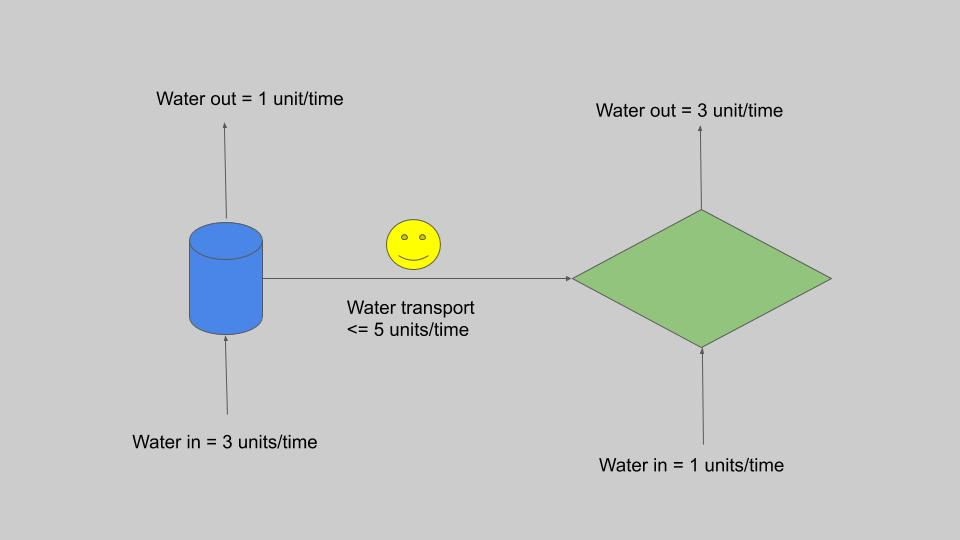

In [4]:
from IPython.display import Image
Image(filename ="MDP.jpg", width=100, height=100)


## Policy Iteration Algorithm
---

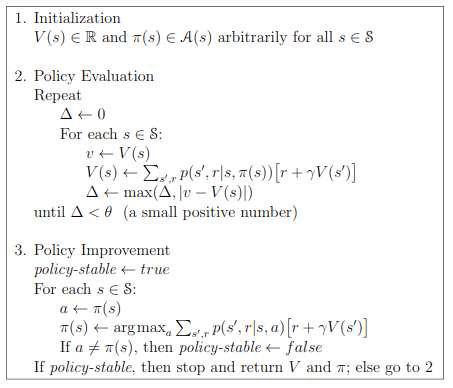

In [3]:
Image(filename="policy_iteration_alg.png", width=50, height=50)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import sys

class watering_problem:
    @staticmethod
    def max_water():
        return 20
    
    @staticmethod
    def gamma():
        return 0.9
    
    @staticmethod
    def optimal_water_reward():
        return 10
    
    @staticmethod
    def watering_cost():
        return -1
    
    @staticmethod
    def non_optimal_water_reward():
        return -5

In [2]:
class Poisson:
    def __init__(self, lamda):
        self.lamda = lamda
        eta = 0.01
        
        self.alpha = 0
        state = 1
        self.vals = {}
        summer = 0
        
        while(1):
            if state == 1:
                temp = poisson.pmf(self.alpha, self.lamda)
                if temp <= eta:
                    self.alpha += 1
                else:
                    self.vals[self.alpha] = temp
                    summer += temp
                    self.beta = self.alpha + 1
                    state = 2
            elif state == 2:
                temp = poisson.pmf(self.beta, self.lamda)
                if temp > eta:
                    self.vals[self.beta] = temp
                    summer += temp
                    self.beta += 1
                else:
                    break
                    
        added_val = (1-summer)/(self.beta - self.alpha)
        for key in self.vals:
            self.vals[key] += added_val
    
    def __getitem__(self, n):
        try:
            Ret_value = self.vals[n]
        except(KeyError):
            Ret_value = 0
        finally:
            return Ret_value

In [3]:
class location:
    def __init__(self, in_water, out_water):
        self.alpha = out_water
        self.beta = in_water
        
        self.poissionOutWater = Poisson(self.alpha)
        self.poissionInWater = Poisson(self.beta)

# initialize locations
well = location(3, 1)
plot = location(1, 3)


In [4]:
"""
1. Initialization
"""
value = np.zeros((watering_problem.max_water() + 1, watering_problem.max_water() + 1))
policy = value.copy().astype(int)


In [5]:
"""
2. Policy Evaluation
"""

def expected_reward(state, action):
    global value
    """
    :param state: is a tuple of numbers, amount of water in well and plot
    :param action: is the amount of water transferred from well to the plot 0 <= action <= 5
    :return: 
    """
    
    reward = 0
    new_state = [max(min(state[0] - action, watering_problem.max_water()), 0), max(min(state[1] + action, watering_problem.max_water()), 0)]
    
    # cost for moving the water
    reward = reward + watering_problem.watering_cost() * abs(action)
    
    for alpha_a in range(well.poissionOutWater.alpha, well.poissionOutWater.beta):
        for beta_a in range(plot.poissionOutWater.alpha, plot.poissionOutWater.beta):
            for alpha_b in range(well.poissionInWater.alpha, well.poissionInWater.beta):
                for beta_b in range(plot.poissionInWater.alpha, plot.poissionInWater.beta):
                    """
                    alpha_a : sample of water leaving the well
                    alpha_b : sample of water entering the well
                    beta_a  : sample of water leaving the plot
                    beta_b  : sample of water entering the plot
                    prob    : probability of this event happening 
                    """
                    
                    prob = well.poissionOutWater.vals[alpha_a] * plot.poissionOutWater.vals[beta_a] * well.poissionInWater[alpha_b] * plot.poissionInWater[beta_b]
                    
                    valid_out_well = min(new_state[0], alpha_a)
                    valid_out_plot = min(new_state[1], beta_a)
                    
                    # check if we are in optimal watering conditions and reward appropriately
                    rew = 0
                    if (state[1] >= 5) and (state[1] <= 10):
                        rew += watering_problem.optimal_water_reward()
                    elif (state[1] <= 3) or (state[1] >= 18):
                        rew += watering_problem.non_optimal_water_reward()
                    
                    # calculate the new state based on the values of the 4 random variables
                    new_s = [0,0]
                    new_s[0] = max(min(new_state[0] - valid_out_well + alpha_b, watering_problem.max_water()), 0)
                    new_s[1] = max(min(new_state[1] - valid_out_plot + beta_b, watering_problem.max_water()), 0)
                    
                    # Bellman equation 
                    reward += prob * (rew + 0.9 * value[new_s[0]][new_s[1]])
    
    return reward

def policy_evaluation():
    global value
       
    # eta /= 10 
    
    while(1):
        sigma = 0
        
        for i in range(value.shape[0]):
            for j in range(value.shape[1]):
                
                old_val = value[i][j]
                value[i][j] = expected_reward([i,j], policy[i][j])
                
                sigma = max(sigma, abs(value[i][j] - old_val))
                print('.', end='')
                sys.stdout.flush()
        
        print(sigma)
        sys.stdout.flush()
        
        if sigma < 1:
            break

# initial value of eta
# eta = 50 

In [6]:
"""
3. Policy Improvement
"""
def policy_improvement():
    global policy
    
    policy_stable = True
    for i in range(value.shape[0]):
        for j in range(value.shape[1]):
            old_action = policy[i][j]
            
            max_act_val = None
            max_act = None
            
            potential_water_transported = min(i, 5)
            
            for act in range(potential_water_transported + 1):
                sigma = expected_reward([i,j], act)
                
                if max_act_val == None:
                    max_act_val = sigma
                    max_act = act
                elif max_act_val < sigma:
                    max_act_val = sigma
                    max_act = act
            
            policy[i][j] = max_act
            
            if old_action != policy[i][j]:
                policy_stable = False
                
    return policy_stable 

.........................................................................................................................................................................................................................................................................................................................................................................................................................................................17.529352591118013
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................9.734927081753995
.................................................................................

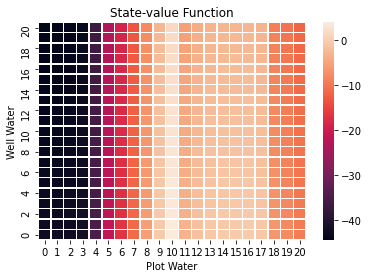

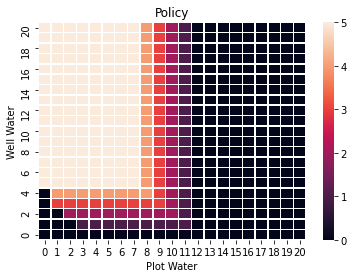

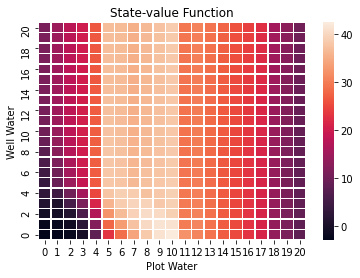

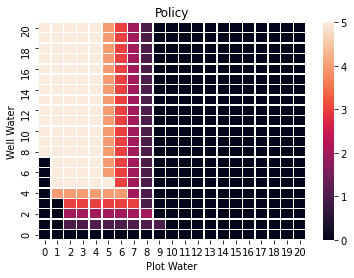

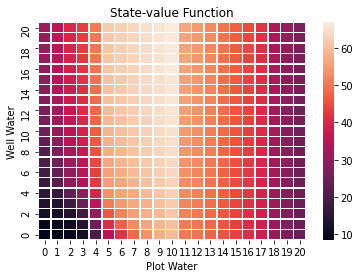

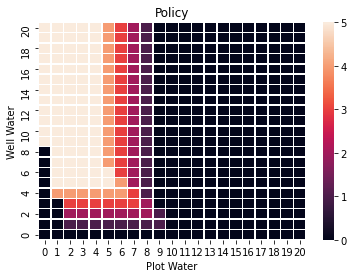

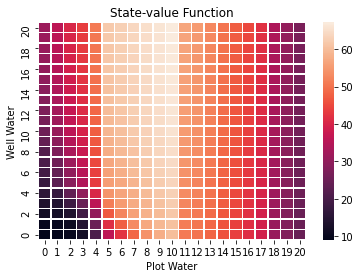

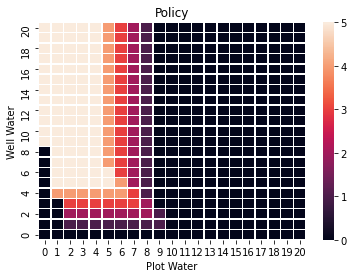

In [7]:
def save_policy():
    save_policy.counter += 1
    ax = sns.heatmap(policy, linewidth=0.5)
    ax.invert_yaxis()
    plt.title("Policy")
    plt.xlabel("Plot Water")
    plt.ylabel("Well Water")
    plt.savefig('policy'+str(save_policy.counter)+'.svg')
    plt.show()
    plt.close()
    
def save_value():
    save_value.counter += 1
    ax = sns.heatmap(value, linewidth=0.5)
    ax.invert_yaxis()
    plt.title("State-value Function")
    plt.xlabel("Plot Water")
    plt.ylabel("Well Water")
    plt.savefig('value'+ str(save_value.counter)+'.svg')
    plt.show()
    plt.close()

save_policy.counter = 0
save_value.counter = 0

while(1):
    policy_evaluation()
    pol = policy_improvement()
    save_value()
    save_policy()
    if pol == True:
        break